In [83]:
import pandas as pd

import wandb
import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import os
import numpy as np
import seaborn as sbs
import pandas as pd
import matplotlib.pyplot as plt

In "Validation of synthetic data" the case were the training_data was completely confounded was tested to show that neural networks indeed fit to confounding factors in images. Now the hypothesis is that if we have a small set of unconfounded data we can either use a confounder-free neural network or a DANN to unlearn the confounders. For establishing a performance baseline we need to test the SimpleConv on a dataset consisting of the confounded set and the small unconfounded set, otherwise the conditions would not be equal for the different networks.

In this case there are 512 samples from the source domain (with correlating confounders) and a varying number of samples (16 or 64) from the target domain (with no confounders).

In [84]:
model = Models.BrNet()
batch_date = "Mon Aug 29 14:10:50 CEST 2022"
filters = {
    "config.batch_date": batch_date,
    "config.target_domain_samples": 0,
    "summary_metrics.confounder_strength": 0,
    "config.target_domain_confounding":0,
}
# importlib.reload(CI)
# CI.wandb_sync.get_best_runs(project="Hyperparameters", filters=filters, force_reload=False)

In [85]:
def filter(df, reverse=False):
    if not reverse:
        df = df[(df["model"]=="BrNet_DANN_entropy")|(df["model"]=="BrNet")|(df["model"]=="BrNet_DANN_corr")|(df["model"]=="BrNet_CF_free_features_corr_conditioned_0.0")|(df["model"]=="BrNet_CF_free_labels_entropy_conditioned_0.0")|(df["model"]=="BrNet_CF_free_labels_entropy")|(df["model"]=="BrNet_DANN_entropy_conditioned_0.0")|(df["model"]=="BrNet_CF_free_features_corr")|(df["model"]=="BrNet_CF_free_labels_corr")]
    else:
        df = df[(df["model"]!="BrNet_DANN_entropy")&(df["model"]!="BrNet")&(df["model"]!="BrNet_DANN_corr")&(df["model"]!="BrNet_CF_free_features_corr_conditioned_0.0")&(df["model"]!="BrNet_CF_free_labels_entropy_conditioned_0.0")&(df["model"]!="BrNet_CF_free_labels_entropy")&(df["model"]!="BrNet_DANN_entropy_conditioned_0.0")&(df["model"]!="BrNet_CF_free_features_corr")&(df["model"]!="BrNet_CF_free_labels_corr")]
    return df

In [86]:
importlib.reload(CI)
table = CI.helper.BrNet_on_BrNet_data_all(batch_date=batch_date, force_reload=False)
table

Experiment 1:
-- batch_date=Mon Aug 29 14:10:50 CEST 2022
-- test_confounding=0
-- target_domain_samples=0
-- target_domain_confounding=0
-- de_correlate_confounder_target=0
Best runs synced (took 0.0006573200225830078s)
Models re-created (took 0.024354934692382812s)
Runs synced, models re-created and tested (took 0.6188769340515137s)

Experiment 2:
-- batch_date=Mon Aug 29 14:10:50 CEST 2022
-- test_confounding=0
-- target_domain_samples=16
-- target_domain_confounding=0
-- de_correlate_confounder_target=0
Best runs synced (took 0.0006563663482666016s)
Models re-created (took 0.025011301040649414s)
Runs synced, models re-created and tested (took 0.6650364398956299s)

Experiment 3:
-- batch_date=Mon Aug 29 14:10:50 CEST 2022
-- test_confounding=1
-- target_domain_samples=0
-- target_domain_confounding=1
-- de_correlate_confounder_target=1
Best runs synced (took 0.0006673336029052734s)
Models re-created (took 0.02413010597229004s)
Runs synced, models re-created and tested (took 0.703001

,model,classification_accuracy,confounder_accuracy,random,experiment,summary_metrics.confounder_strength,config.target_domain_samples,config.target_domain_confounding,config.de_correlate_confounder_target,config.batch_date
0,BrNet_CF_free_DANN_labels_entropy_features_cor...,0.826172,0.000000,872159063825416833,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
1,BrNet_CF_free_DANN_labels_entropy,0.823242,0.000000,8061147370178950102,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
2,BrNet_CF_free_features_corr_conditioned_0.0,0.811523,0.000000,7110292235655648381,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
3,BrNet_CF_free_DANN_labels_entropy_features_corr,0.797852,0.000000,3287260045942633902,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
4,BrNet_CF_free_labels_entropy_conditioned_0.0,0.781250,0.000000,7807255876608361588,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
...,...,...,...,...,...,...,...,...,...,...
70,BrNet_DANN_entropy_conditioned_0.0,0.826172,0.652344,8888566195621620401,5,1,64,1,1,Mon Aug 29 14:10:50 CEST 2022
71,BrNet,0.824219,0.667969,4261446115027341535,5,1,64,1,1,Mon Aug 29 14:10:50 CEST 2022
72,BrNet_DANN_entropy,0.821289,0.672852,4869715103823078101,5,1,64,1,1,Mon Aug 29 14:10:50 CEST 2022
73,BrNet_DANN_corr,0.817383,0.676758,6951240682581189335,5,1,64,1,1,Mon Aug 29 14:10:50 CEST 2022


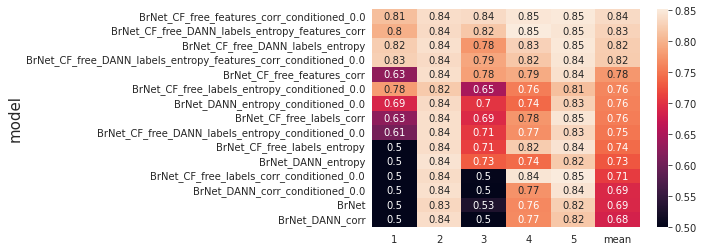

In [87]:
CI.plot.plot_heatmap_with_mean(table)

/home/raffi/anaconda3/envs/confounder_3.10/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


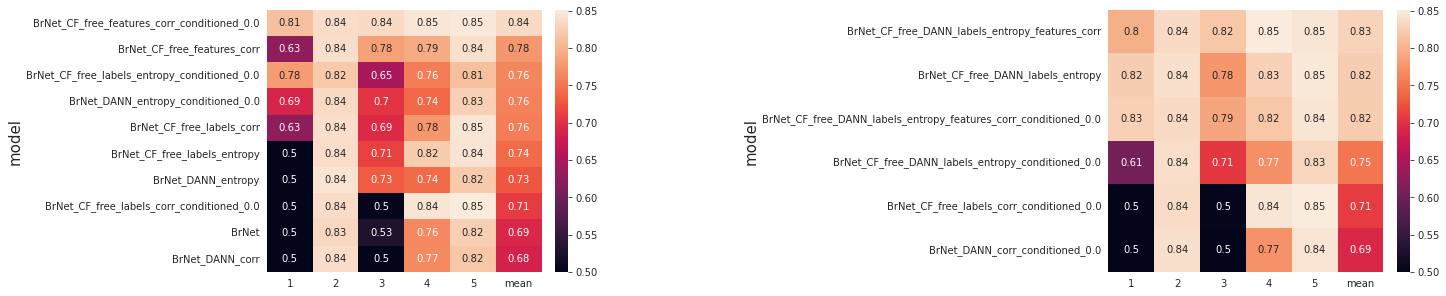

In [88]:
CI.plot.split_and_plot_heatmaps_with_mean(table)

# No confounders in target data

### With 0 training-samples from target population

/home/raffi/anaconda3/envs/confounder_3.10/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


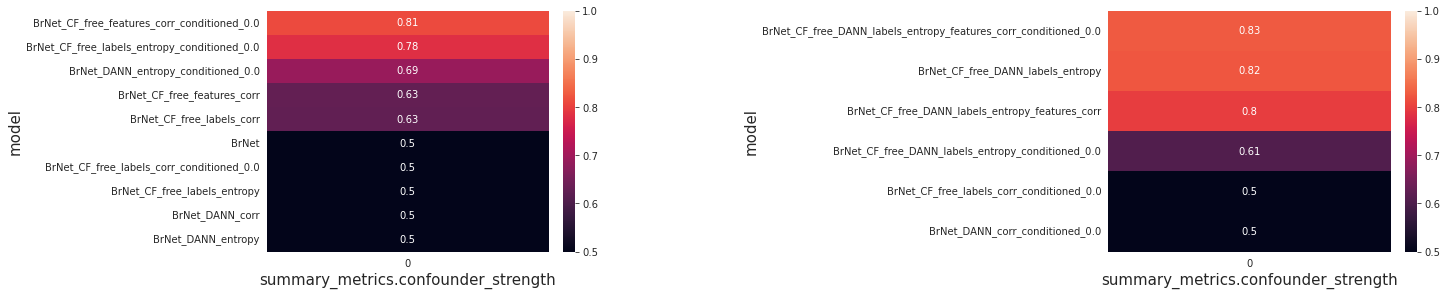

In [89]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=0, de_correlate_confounder_target=0)

### With 16 training-samples from target population

The accuracy with more samples is the same but the network converges faster.

/home/raffi/anaconda3/envs/confounder_3.10/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


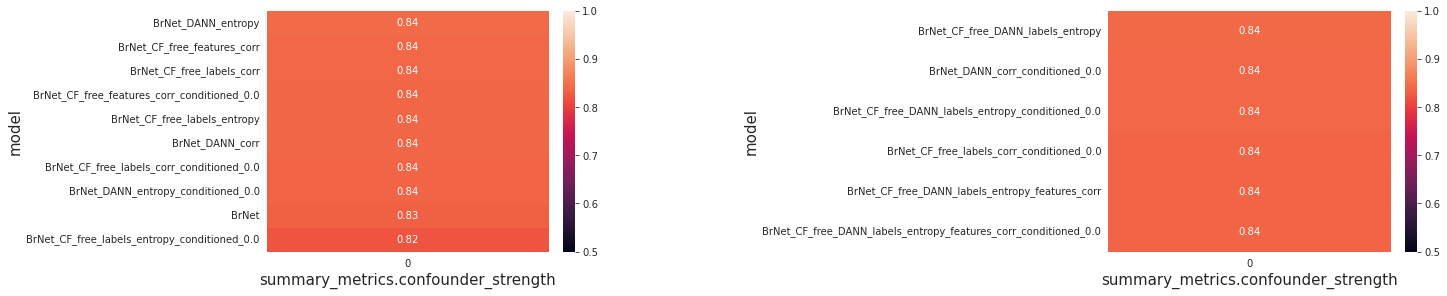

In [90]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=16, de_correlate_confounder_target=0)

config_filter = {"confounder_strength":1, "target_domain_samples":16, "de_correlate_confounder_target": False, "batch_date": date, "target_domain_confounding":0}
p.accuracy_vs_epoch(file, config_filter, groupby="model")

# De-correlated confounders in target- and test-data

### With 0 training-samples from target population


/home/raffi/anaconda3/envs/confounder_3.10/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


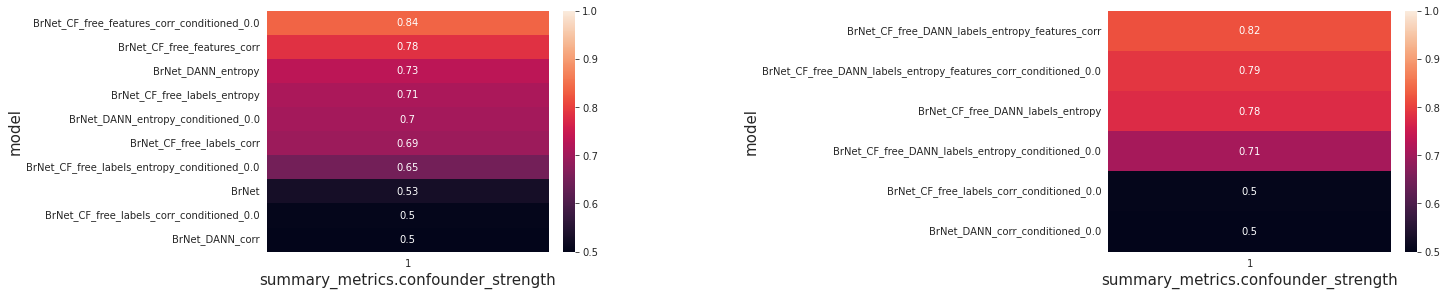

In [91]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=0, de_correlate_confounder_target=1)

### With 16 training-samples from target population

/home/raffi/anaconda3/envs/confounder_3.10/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


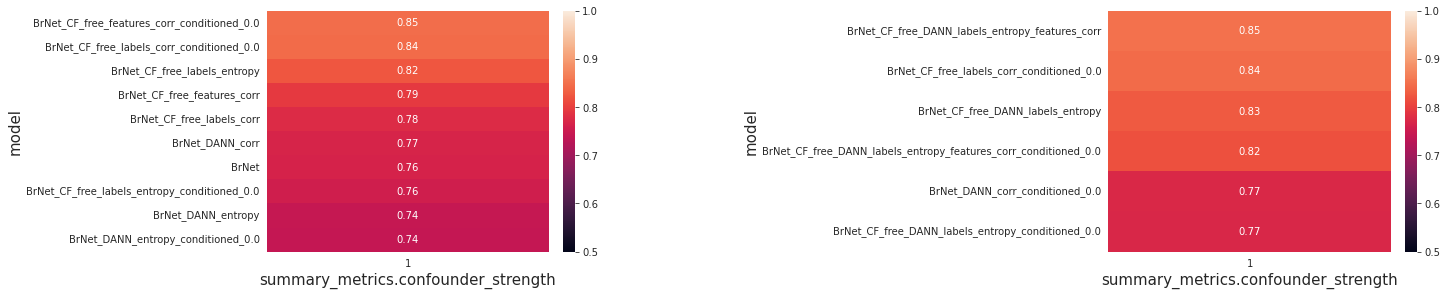

In [92]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=16, de_correlate_confounder_target=1)

### With 64 training-samples from target population

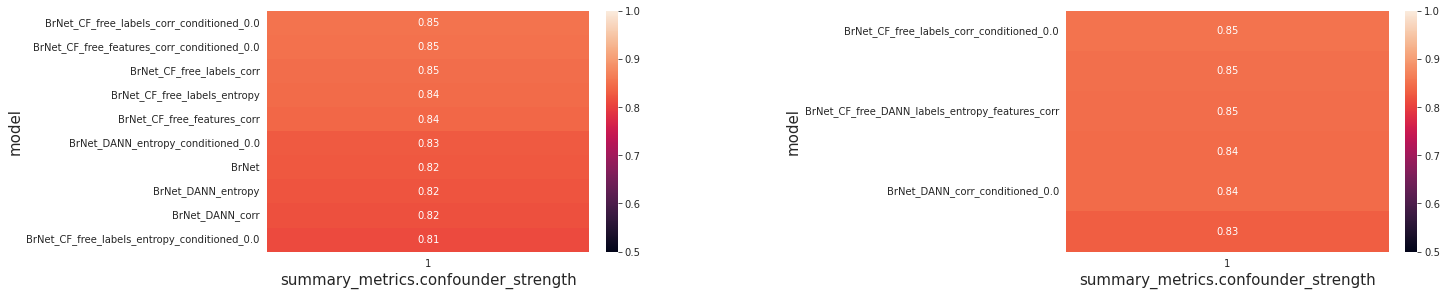

In [93]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=64, de_correlate_confounder_target=1)